In [1]:
import os
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import torch.nn as nn

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
# from unet import unet
from ifcn import unet
import json
import matplotlib.pyplot as plt

from PIL import Image
import nibabel as nib

In [2]:
mdir = '/home-2/jwei9@jhu.edu/work2/mamba/scoliosis'
ddir = '/home-2/jwei9@jhu.edu/work2/mamba/scoliosis/ifcn/data_uncropped'
trdir = os.path.join(ddir, 'train')
vadir = os.path.join(ddir, 'validation')
tedir = os.path.join(ddir, 'test')

In [7]:
idir = os.path.join(trdir, '0')

In [11]:
files = os.listdir(idir)
files.sort()

### check weights

In [12]:
weight = np.zeros((26,1280,640))

for file in files:
    if file.startswith('weight_'):
        weightnum = int(file.split('_')[2])
        weight[weightnum, :, :] = np.array(Image.open(os.path.join(idir, file)))

0


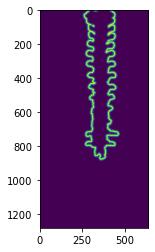

1


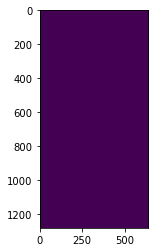

2


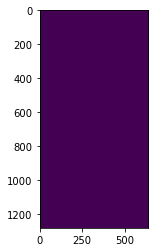

3


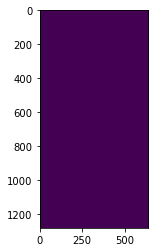

4


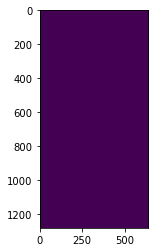

5


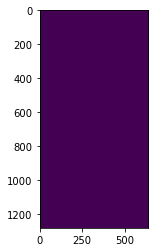

6


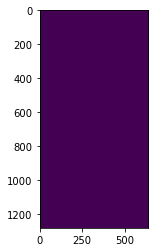

7


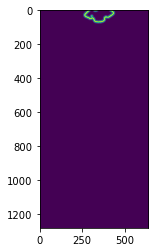

8


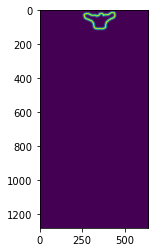

9


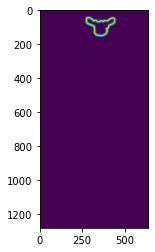

10


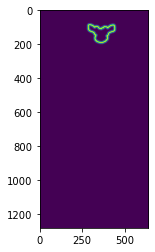

11


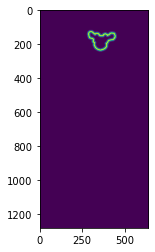

12


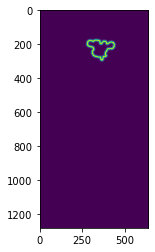

13


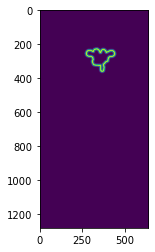

14


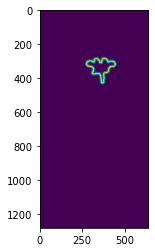

15


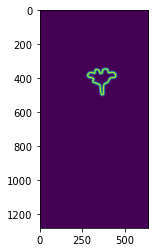

16


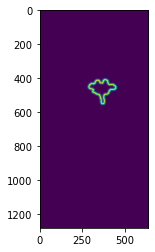

17


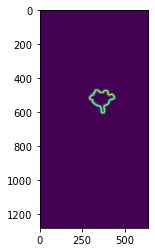

18


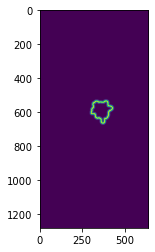

19


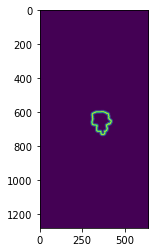

20


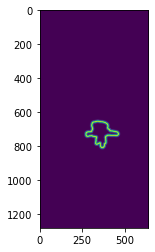

21


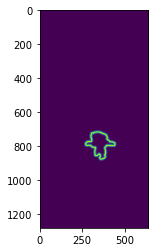

22


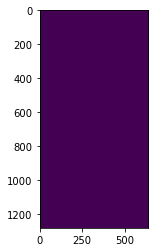

23


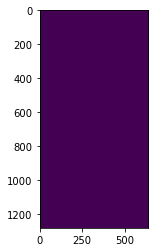

24


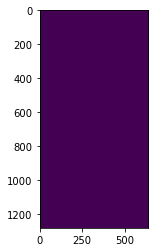

25


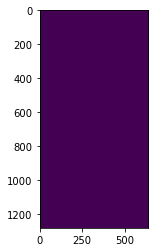

In [23]:
for vert in range(np.shape(weight)[0]):
    print(vert)
    layer = weight[vert, :, :]
    plt.imshow(layer)
    plt.show()

In [64]:
# function for middle height value of a given vertebrae, should be x or shape[0]
def z_mid(mask, chosen_vert):
    mask_vert = mask[chosen_vert,:,:]
    indices = np.nonzero(mask_vert)
    lower = [np.min(i) for i in indices]
    upper = [np.max(i) for i in indices]

    return int((lower[0] + upper[0]) / 2)


# find height range of all vertebra, dim shape[0]
def findZRange(mask, verts):
    # list available vertebrae
    vert_low = verts[1]  # be careful to avoid 0 (bg), this should be min vert
    vert_up = verts[-1]

    z_range = [z_mid(mask, vert_low), z_mid(mask, vert_up)]
    print('Range of Z axis is:',z_range)
#     logging.info('Range of Z axis %s' % z_range)
    return z_range

In [49]:
casepath = idir
casefiles = os.listdir(casepath)
verts = []

# first get mask - use this for finding z range
mask = np.zeros((26, 1280, 640))  # max vert is 25
for casefile in casefiles:
    if not casefile.startswith('vertebra'):
        continue  # skip image file
    # print('casefile is:', casefile)  # debug
    vertnum = int(casefile.split('_')[1])  # vertebra num
    verts.append(vertnum)
    itermask = np.array(Image.open(os.path.join(casepath, casefile)))
    mask[vertnum, :, :] = itermask  # now we have full 26-layer mask
    
verts.sort()

In [63]:
z_range = findZRange(mask, verts)

size of indices is (2, 7992)
evaluating index [ 0  0  0 ... 69 69 69]
evaluating index [289 290 291 ... 347 355 356]
lower is [0, 263] and upper is [69, 431]
size of indices is (2, 12766)
evaluating index [716 716 716 ... 875 875 875]
evaluating index [331 332 333 ... 359 360 361]
lower is [716, 268] and upper is [875, 439]
Range of Z axis is: [34, 795]


In [66]:
z_range = findZRange(mask, verts)

Range of Z axis is: [34, 795]


### what's wrong with case 155 (basically case 7 is empty!!!)

In [77]:
# function for middle height value of a given vertebrae, should be x or shape[0]
def z_mid(mask, chosen_vert):
    mask_vert = mask[chosen_vert,:,:]
    indices = np.nonzero(mask_vert)
#     print('finding lower')
#     lower = [np.min(i) for i in indices]
    print('finding upper')
    upper = [np.max(i) for i in indices]
    print('finding lower')
    lower = [np.min(i) for i in indices]

    return int((lower[0] + upper[0]) / 2)


# find height range of all vertebra, dim shape[0]
def findZRange(mask, verts):
    # list available vertebrae
    vert_low = verts[1]  # be careful to avoid 0 (bg), this should be min vert
    vert_up = verts[-1]

    z_range = [z_mid(mask, vert_low), z_mid(mask, vert_up)]
    print('Range of Z axis is:',z_range)
#     logging.info('Range of Z axis %s' % z_range)
    return z_range

In [91]:
casepath = idir
casefiles = os.listdir(casepath)
verts = []

# first get mask - use this for finding z range
mask = np.zeros((26, 1280, 640))  # max vert is 25
for casefile in casefiles:
    if casefile.startswith('image'):
        img = np.array(Image.open(os.path.join(casepath,casefile)))
    if not casefile.startswith('vertebra'):
        continue  # skip image file
    # print('casefile is:', casefile)  # debug
    vertnum = int(casefile.split('_')[1])  # vertebra num
    if vertnum == 7:
        continue
    verts.append(vertnum)
    itermask = np.array(Image.open(os.path.join(casepath, casefile)))
    mask[vertnum, :, :] = itermask  # now we have full 26-layer mask
    
verts.sort()

In [92]:
z_range = findZRange(mask, verts)

finding upper
finding lower
finding upper
finding lower
Range of Z axis is: [24, 827]


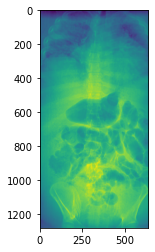

In [81]:
plt.imshow(img)

0


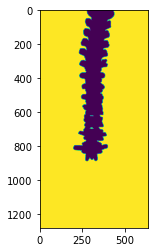

8


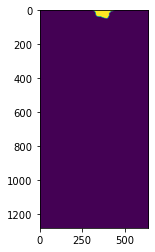

9


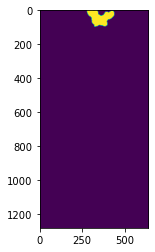

10


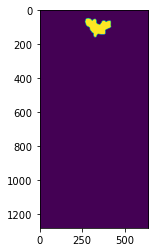

11


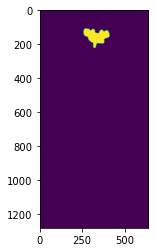

12


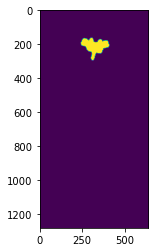

13


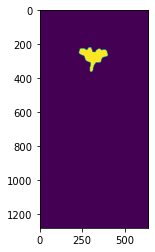

14


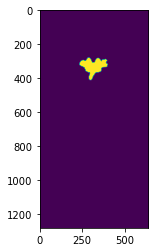

15


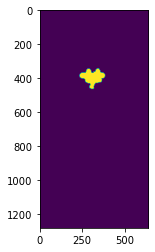

16


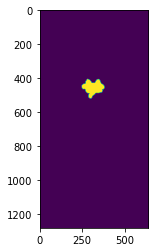

17


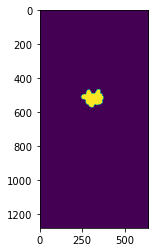

18


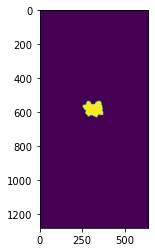

19


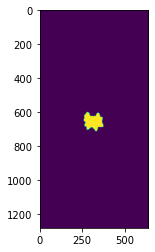

20


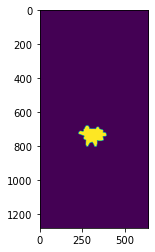

21


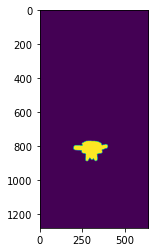

In [93]:
for vert in verts:
    print(vert)
    plt.imshow(mask[vert,:,:])
    plt.show()

### what's wrong with case 288 (basically case 7 is empty!!! again)

In [100]:
idir = os.path.join(trdir, '228')
files = os.listdir(idir)
files.sort()

In [108]:
# function for middle height value of a given vertebrae, should be x or shape[0]
def z_mid(mask, chosen_vert):
    mask_vert = mask[chosen_vert,:,:]
    indices = np.nonzero(mask_vert)
    print('finding lower')
    lower = [np.min(i) for i in indices]
    print('finding upper')
    upper = [np.max(i) for i in indices]

    return int((lower[0] + upper[0]) / 2)


# find height range of all vertebra, dim shape[0]
def findZRange(mask, verts):
    # list available vertebrae
    vert_low = verts[1]  # be careful to avoid 0 (bg), this should be min vert
    vert_up = verts[-1]

    z_range = [z_mid(mask, vert_low), z_mid(mask, vert_up)]
    print('Range of Z axis is:',z_range)
#     logging.info('Range of Z axis %s' % z_range)
    return z_range

In [106]:
casepath = idir
casefiles = os.listdir(casepath)
verts = []

# first get mask - use this for finding z range
mask = np.zeros((26, 1280, 640))  # max vert is 25
for casefile in casefiles:
    if casefile.startswith('image'):
        img = np.array(Image.open(os.path.join(casepath,casefile)))
    if not casefile.startswith('vertebra'):
        continue  # skip image file
    # print('casefile is:', casefile)  # debug
    vertnum = int(casefile.split('_')[1])  # vertebra num
    if vertnum == 7:
        continue
    verts.append(vertnum)
    itermask = np.array(Image.open(os.path.join(casepath, casefile)))
    mask[vertnum, :, :] = itermask  # now we have full 26-layer mask
    
verts.sort()

In [109]:
z_range = findZRange(mask, verts)

finding lower
finding upper
finding lower
finding upper
Range of Z axis is: [25, 845]


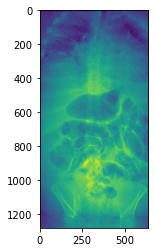

In [103]:
plt.imshow(img)

0


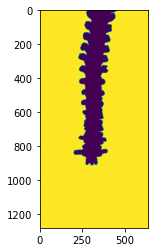

In [113]:
for vert in verts:
    if vert == 0 or vert == 7:
        print(vert)
        plt.imshow(mask[vert,:,:])
        plt.show()

### check cropping results

In [3]:
idir2 = '/home-2/jwei9@jhu.edu/work2/mamba/scoliosis/ifcn/data/train/0'

In [6]:
casepath = idir2
casefiles = os.listdir(casepath)
verts = []

# first get mask - use this for finding z range
mask = np.zeros((26, 761, 640))  # max vert is 25
for casefile in casefiles:
    if casefile.startswith('image'):
        img = np.array(Image.open(os.path.join(casepath,casefile)))
    if not casefile.startswith('vertebra'):
        continue  # skip image file
    # print('casefile is:', casefile)  # debug
    vertnum = int(casefile.split('_')[1])  # vertebra num
    if vertnum == 7:
        continue
    verts.append(vertnum)
    itermask = np.array(Image.open(os.path.join(casepath, casefile)))
    mask[vertnum, :, :] = itermask  # now we have full 26-layer mask
    
verts.sort()

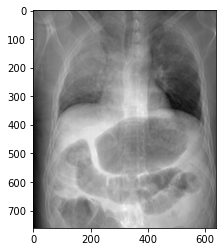

In [11]:
plt.imshow(img, cmap='gray')

0


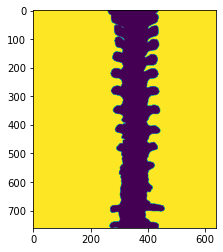

8


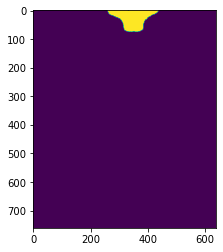

9


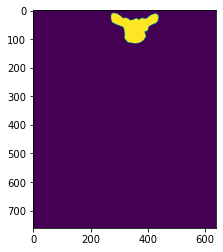

10


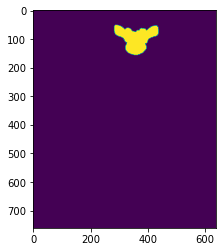

11


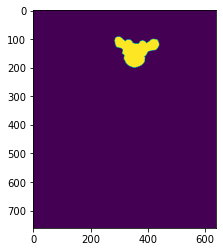

12


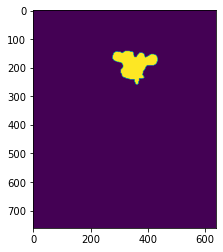

13


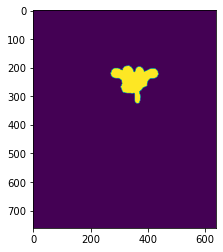

14


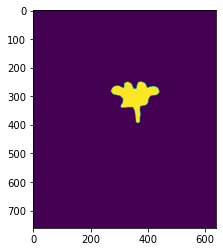

15


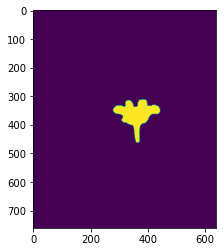

16


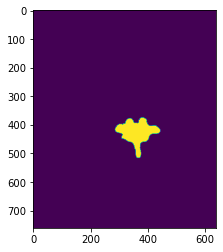

17


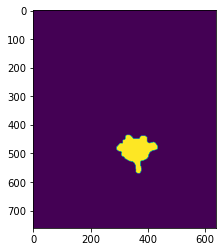

18


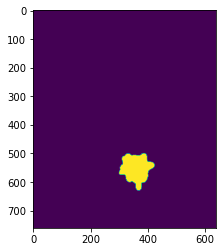

19


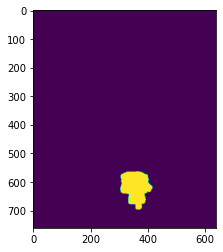

20


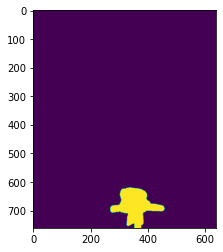

21


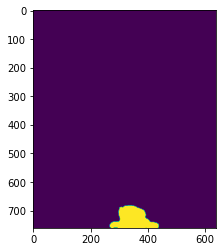

In [7]:
for vert in verts:
    print(vert)
    plt.imshow(mask[vert,:,:])
    plt.show()